# Importing and installing dependencies

In [1]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install mediapipe


Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable

In [4]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable


In [6]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Keypoints using MP holistic

In [8]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [9]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [12]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [30]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [33]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret , frame =cap.read()
    
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Show to screen 
        cv2.imshow('OpenCV Feed', image)
        # Break Gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
        

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [21]:
results

mediapipe.python.solution_base.SolutionOutputs

In [22]:
draw_landmarks(frame,results)

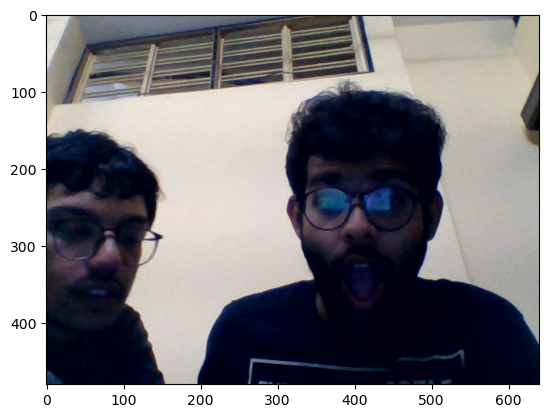

In [99]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# Extracting key point values

In [34]:
len(results.left_hand_landmarks.landmark)


21

In [35]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [36]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [38]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [45]:
result_test = extract_keypoints(results)

In [46]:
result_test

array([ 0.48615915,  0.45087421, -0.64794004, ...,  0.        ,
        0.        ,  0.        ])

In [47]:
np.save('0', result_test)

In [48]:
np.load('0.npy')

array([ 0.48615915,  0.45087421, -0.64794004, ...,  0.        ,
        0.        ,  0.        ])

# Folders for collection of data 

In [43]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30


In [44]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action ,str(sequence)))
        except:
            pass

# Collecting keypoint values for training and testing 

In [49]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# Pre process data , create labels and features 

In [50]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [51]:
label_map = {label:num for num, label in enumerate(actions)}

In [52]:
label_map


{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [53]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [54]:
np.array(sequences).shape

(90, 30, 1662)

In [55]:
np.array(labels).shape


(90,)

In [56]:
X = np.array(sequences)


In [57]:
X.shape


(90, 30, 1662)

In [58]:
y = to_categorical(labels).astype(int)


In [59]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [61]:
y_test.shape


(5, 3)

# Build and Train LSTM network

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [63]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [64]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [67]:
actions.shape[0]

3

In [68]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [69]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])


Epoch 1/2000
3/3 [==============================] - 8s 106ms/step - loss: 2.0903 - categorical_accuracy: 0.3176
Epoch 2/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.1201 - categorical_accuracy: 0.3765
Epoch 3/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.0366 - categorical_accuracy: 0.3294
Epoch 4/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.0361 - categorical_accuracy: 0.4000
Epoch 5/2000
3/3 [==============================] - 0s 132ms/step - loss: 1.0790 - categorical_accuracy: 0.4588
Epoch 6/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.0553 - categorical_accuracy: 0.4353
Epoch 7/2000
3/3 [==============================] - 0s 137ms/step - loss: 1.0240 - categorical_accuracy: 0.3529
Epoch 8/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.9342 - categorical_accuracy: 0.4471
Epoch 9/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.8654 - categorical_accuracy:

3/3 [==============================] - 0s 152ms/step - loss: 0.3475 - categorical_accuracy: 0.8235
Epoch 74/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.3796 - categorical_accuracy: 0.8353
Epoch 75/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.4178 - categorical_accuracy: 0.7882
Epoch 76/2000
3/3 [==============================] - 0s 151ms/step - loss: 0.3882 - categorical_accuracy: 0.8353
Epoch 77/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.3726 - categorical_accuracy: 0.8118
Epoch 78/2000
3/3 [==============================] - 0s 152ms/step - loss: 0.3730 - categorical_accuracy: 0.8118
Epoch 79/2000
3/3 [==============================] - 0s 150ms/step - loss: 0.3180 - categorical_accuracy: 0.8824
Epoch 80/2000
3/3 [==============================] - 1s 205ms/step - loss: 0.3583 - categorical_accuracy: 0.8353
Epoch 81/2000
3/3 [==============================] - 1s 165ms/step - loss: 0.3636 - categorical_accuracy: 0.81

3/3 [==============================] - 1s 256ms/step - loss: 0.1805 - categorical_accuracy: 0.9059
Epoch 146/2000
3/3 [==============================] - 0s 163ms/step - loss: 0.1748 - categorical_accuracy: 0.9294
Epoch 147/2000
3/3 [==============================] - 1s 156ms/step - loss: 0.2560 - categorical_accuracy: 0.8941
Epoch 148/2000
3/3 [==============================] - 1s 167ms/step - loss: 0.3643 - categorical_accuracy: 0.8235
Epoch 149/2000
3/3 [==============================] - 0s 153ms/step - loss: 0.4423 - categorical_accuracy: 0.8353
Epoch 150/2000
3/3 [==============================] - 0s 151ms/step - loss: 0.3869 - categorical_accuracy: 0.8706
Epoch 151/2000
3/3 [==============================] - 0s 143ms/step - loss: 0.3571 - categorical_accuracy: 0.8706
Epoch 152/2000
3/3 [==============================] - 0s 147ms/step - loss: 0.4096 - categorical_accuracy: 0.7882
Epoch 153/2000
3/3 [==============================] - 0s 146ms/step - loss: 0.2369 - categorical_accura

Epoch 217/2000
3/3 [==============================] - 1s 190ms/step - loss: 0.1609 - categorical_accuracy: 0.9412
Epoch 218/2000
3/3 [==============================] - 1s 180ms/step - loss: 0.1448 - categorical_accuracy: 0.9529
Epoch 219/2000
3/3 [==============================] - 1s 174ms/step - loss: 0.1166 - categorical_accuracy: 0.9529
Epoch 220/2000
3/3 [==============================] - 1s 180ms/step - loss: 0.1014 - categorical_accuracy: 0.9765
Epoch 221/2000
3/3 [==============================] - 1s 156ms/step - loss: 0.1025 - categorical_accuracy: 0.9529
Epoch 222/2000
3/3 [==============================] - 1s 171ms/step - loss: 0.1075 - categorical_accuracy: 0.9412
Epoch 223/2000
3/3 [==============================] - 1s 194ms/step - loss: 0.0623 - categorical_accuracy: 0.9765
Epoch 224/2000
3/3 [==============================] - 1s 172ms/step - loss: 0.0549 - categorical_accuracy: 0.9882
Epoch 225/2000
3/3 [==============================] - 1s 177ms/step - loss: 0.0811 - cat

3/3 [==============================] - 1s 172ms/step - loss: 0.0537 - categorical_accuracy: 0.9882
Epoch 289/2000
3/3 [==============================] - 0s 162ms/step - loss: 0.0463 - categorical_accuracy: 0.9765
Epoch 290/2000
3/3 [==============================] - 1s 199ms/step - loss: 0.0394 - categorical_accuracy: 0.9882
Epoch 291/2000
3/3 [==============================] - 0s 162ms/step - loss: 0.0279 - categorical_accuracy: 0.9765
Epoch 292/2000
3/3 [==============================] - 0s 173ms/step - loss: 0.0154 - categorical_accuracy: 1.0000
Epoch 293/2000
3/3 [==============================] - 1s 179ms/step - loss: 0.0161 - categorical_accuracy: 0.9882
Epoch 294/2000
3/3 [==============================] - 1s 176ms/step - loss: 0.0119 - categorical_accuracy: 1.0000
Epoch 295/2000
3/3 [==============================] - 1s 182ms/step - loss: 0.0123 - categorical_accuracy: 1.0000
Epoch 296/2000
3/3 [==============================] - 1s 166ms/step - loss: 0.0091 - categorical_accura

Epoch 360/2000
3/3 [==============================] - 0s 141ms/step - loss: 0.2625 - categorical_accuracy: 0.9176
Epoch 361/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.3341 - categorical_accuracy: 0.8824
Epoch 362/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.4765 - categorical_accuracy: 0.8353
Epoch 363/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.4345 - categorical_accuracy: 0.8471
Epoch 364/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.4068 - categorical_accuracy: 0.8235
Epoch 365/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.3326 - categorical_accuracy: 0.8471
Epoch 366/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.2653 - categorical_accuracy: 0.9059
Epoch 367/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.2540 - categorical_accuracy: 0.9176
Epoch 368/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.2705 - cat

3/3 [==============================] - 1s 170ms/step - loss: 0.1745 - categorical_accuracy: 0.9294
Epoch 432/2000
3/3 [==============================] - 1s 174ms/step - loss: 0.2919 - categorical_accuracy: 0.8824
Epoch 433/2000
3/3 [==============================] - 1s 185ms/step - loss: 0.1339 - categorical_accuracy: 0.9647
Epoch 434/2000
3/3 [==============================] - 1s 212ms/step - loss: 0.1175 - categorical_accuracy: 0.9529
Epoch 435/2000
3/3 [==============================] - 1s 206ms/step - loss: 0.1294 - categorical_accuracy: 0.9529
Epoch 436/2000
3/3 [==============================] - 1s 168ms/step - loss: 0.1087 - categorical_accuracy: 0.9765
Epoch 437/2000
3/3 [==============================] - 0s 163ms/step - loss: 0.0914 - categorical_accuracy: 0.9647
Epoch 438/2000
3/3 [==============================] - 0s 160ms/step - loss: 0.0780 - categorical_accuracy: 0.9647
Epoch 439/2000
3/3 [==============================] - 0s 155ms/step - loss: 0.1097 - categorical_accura

Epoch 503/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.0272 - categorical_accuracy: 0.9882
Epoch 504/2000
3/3 [==============================] - 0s 146ms/step - loss: 0.0236 - categorical_accuracy: 0.9882
Epoch 505/2000
3/3 [==============================] - 0s 155ms/step - loss: 0.0216 - categorical_accuracy: 0.9882
Epoch 506/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.0225 - categorical_accuracy: 0.9882
Epoch 507/2000
3/3 [==============================] - 0s 147ms/step - loss: 0.0210 - categorical_accuracy: 0.9882
Epoch 508/2000
3/3 [==============================] - 0s 153ms/step - loss: 0.0203 - categorical_accuracy: 0.9882
Epoch 509/2000
3/3 [==============================] - 0s 145ms/step - loss: 0.0253 - categorical_accuracy: 0.9882
Epoch 510/2000
3/3 [==============================] - 0s 157ms/step - loss: 0.0337 - categorical_accuracy: 0.9882
Epoch 511/2000
3/3 [==============================] - 0s 146ms/step - loss: 0.0533 - cat

3/3 [==============================] - 0s 146ms/step - loss: 0.7212 - categorical_accuracy: 0.8118
Epoch 575/2000
3/3 [==============================] - 0s 154ms/step - loss: 0.7391 - categorical_accuracy: 0.8118
Epoch 576/2000
3/3 [==============================] - 0s 146ms/step - loss: 0.9607 - categorical_accuracy: 0.7059
Epoch 577/2000
3/3 [==============================] - 0s 148ms/step - loss: 0.8163 - categorical_accuracy: 0.6471
Epoch 578/2000
3/3 [==============================] - 0s 150ms/step - loss: 0.4371 - categorical_accuracy: 0.8235
Epoch 579/2000
3/3 [==============================] - 0s 143ms/step - loss: 0.8074 - categorical_accuracy: 0.6588
Epoch 580/2000
3/3 [==============================] - 0s 139ms/step - loss: 0.5982 - categorical_accuracy: 0.6941
Epoch 581/2000
3/3 [==============================] - 0s 152ms/step - loss: 0.5393 - categorical_accuracy: 0.8000
Epoch 582/2000
3/3 [==============================] - 0s 170ms/step - loss: 0.5851 - categorical_accura

Epoch 646/2000
3/3 [==============================] - 0s 149ms/step - loss: 0.0445 - categorical_accuracy: 0.9882
Epoch 647/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.0412 - categorical_accuracy: 0.9882
Epoch 648/2000
3/3 [==============================] - 0s 139ms/step - loss: 0.0405 - categorical_accuracy: 0.9882
Epoch 649/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.0381 - categorical_accuracy: 0.9882
Epoch 650/2000
3/3 [==============================] - 0s 159ms/step - loss: 0.0365 - categorical_accuracy: 0.9882
Epoch 651/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.0353 - categorical_accuracy: 0.9882
Epoch 652/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.0331 - categorical_accuracy: 0.9882
Epoch 653/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.0330 - categorical_accuracy: 0.9882
Epoch 654/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.0314 - cat

3/3 [==============================] - 0s 113ms/step - loss: 0.0262 - categorical_accuracy: 0.9882
Epoch 718/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.0253 - categorical_accuracy: 0.9882
Epoch 719/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.0240 - categorical_accuracy: 0.9882
Epoch 720/2000
3/3 [==============================] - 0s 142ms/step - loss: 0.0246 - categorical_accuracy: 0.9882
Epoch 721/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.0249 - categorical_accuracy: 0.9882
Epoch 722/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.0228 - categorical_accuracy: 0.9882
Epoch 723/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.0348 - categorical_accuracy: 0.9882
Epoch 724/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.0387 - categorical_accuracy: 0.9882
Epoch 725/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.0287 - categorical_accura

Epoch 789/2000
3/3 [==============================] - 1s 225ms/step - loss: 0.0138 - categorical_accuracy: 0.9882
Epoch 790/2000
3/3 [==============================] - 1s 176ms/step - loss: 0.0112 - categorical_accuracy: 1.0000
Epoch 791/2000
3/3 [==============================] - 1s 182ms/step - loss: 0.0129 - categorical_accuracy: 0.9882
Epoch 792/2000
3/3 [==============================] - 1s 198ms/step - loss: 0.0106 - categorical_accuracy: 1.0000
Epoch 793/2000
3/3 [==============================] - 1s 208ms/step - loss: 0.0124 - categorical_accuracy: 0.9882
Epoch 794/2000
3/3 [==============================] - 1s 192ms/step - loss: 0.0100 - categorical_accuracy: 1.0000
Epoch 795/2000
3/3 [==============================] - 1s 163ms/step - loss: 0.0103 - categorical_accuracy: 1.0000
Epoch 796/2000
3/3 [==============================] - 1s 170ms/step - loss: 0.0097 - categorical_accuracy: 1.0000
Epoch 797/2000
3/3 [==============================] - 1s 169ms/step - loss: 0.0094 - cat

KeyboardInterrupt: 

In [70]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# Make predictions

In [71]:
res = model.predict(X_test) 

1/1 [==============================] - 1s 679ms/step


In [73]:
np.argmax(res[0])

1

In [74]:
actions[np.argmax(res[4])]


'hello'

In [75]:
actions[np.argmax(y_test[4])]


'hello'

# save weights

In [76]:
model.save('action.h5')


# Evaluation using confusion matrix and accuracy

In [77]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


In [86]:
yhat = model.predict(X_test)


1/1 [==============================] - 0s 40ms/step


In [87]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [88]:
multilabel_confusion_matrix(ytrue, yhat)


array([[[0, 0],
        [1, 4]],

       [[4, 1],
        [0, 0]]], dtype=int64)

In [89]:
accuracy_score(ytrue, yhat)


0.8

# Testing in real time 

In [90]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [100]:
 # 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
thanks
<class 'media

1/1 [==============================] - 0s 38ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
hello
<cl

1/1 [==============================] - 0s 29ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
ilov

1/1 [==============================] - 0s 55ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
hello
